<h3> Sergio Andres Rios Gomez</h3>
<h4> Transformación y procesamiento</h4>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler
import os

In [6]:
ruta_archivo = '../data/raw/Ecommerce Customers-1.csv'
df = pd.read_csv(ruta_archivo)

<p> Dejando solo variables númericas.</p> 

In [9]:
df_num = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 
            'Yearly Amount Spent']].copy()
df_num.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


<p> Normalizar las variables numéricas con RobustScaler</p>

In [10]:
scaler = RobustScaler()

# Ajustar y transformar los datos numéricos
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_scaled.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.032914,0.492364,1.834660,0.458714,0.854114
1,-0.843502,-0.639799,0.145989,-0.727344,-1.023087
2,-0.059185,-0.478110,0.030158,0.477043,-0.108754
3,0.892995,1.269889,-0.254601,-0.345968,0.795627
4,0.181486,0.594537,0.341790,0.762787,0.963967


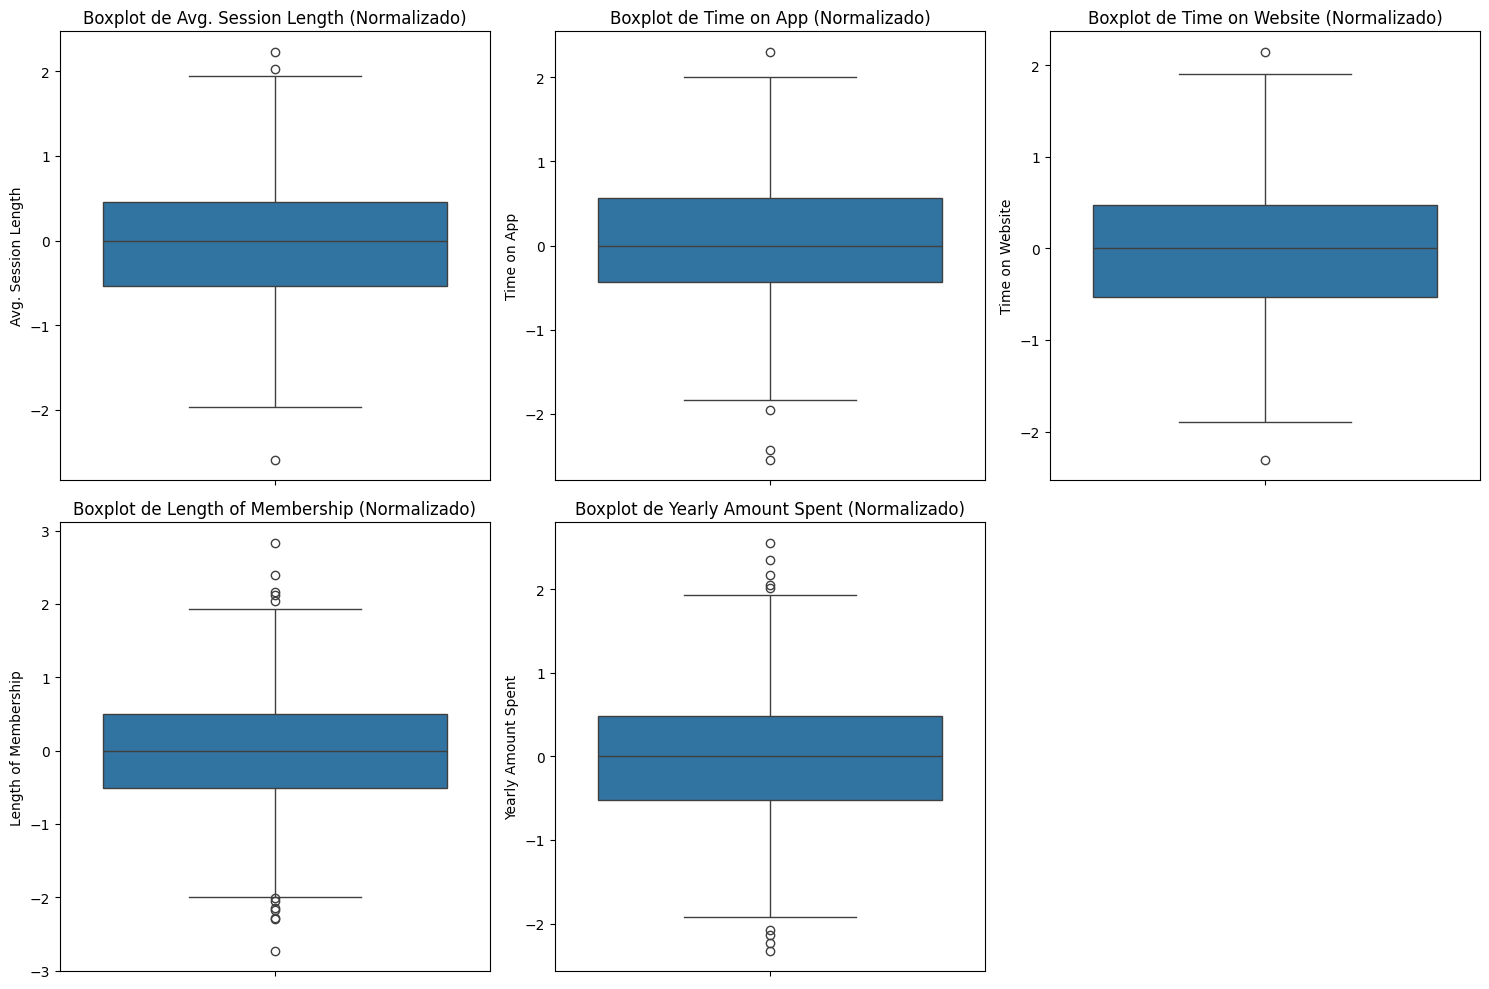

In [13]:
# 3. Visualización de datos normalizados.
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_num_scaled.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_num_scaled[column])
    plt.title(f'Boxplot de {column} (Normalizado)')
plt.tight_layout()
plt.show()

<p> Guardar archivo con data procesada en la ruta especifica.</p>

In [19]:
ruta_processed = os.path.join(os.getcwd(), '..', 'data','processed')
if not os.path.exists(ruta_processed):
    os.makedirs(ruta_processed)
ruta_archivo_csv = os.path.join(ruta_processed, 'df_num_scaled.csv')
df_num_scaled.to_csv(ruta_archivo_csv, index=False)